### MLSL1 Group Assignment - 

#### GROUP NO. - 06

__1) 12120040 - Rohit Thakur  
2) 12120035 - Mohit Kothari  
3) 12120027 - Rohini Purnima  
4) 12120097 - Unnati Khinvasara  
5) 12120011 - Harsimar Singh Arora__

In [1]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus as pdot
import matplotlib.pyplot as plt
from joblib import dump
from six import StringIO
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
folderPath = "C:/Users/harsi/OneDrive - Indian School of Business/AMPBA/Term3/MLSL1/GroupProject"
filePath = "Dataset_20220903.xlsx"
Final_Dataset = pd.read_excel(folderPath+'/'+filePath, sheet_name='Sheet1')
Final_Dataset.head()

,Company,Quarter,Start Price,Return,Return_classification,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,Volatility of average daily returns (%),Excess total returns over NIFTY (Percentage points),Production (Q-o-Q % change),Domestic sales (Q-o-Q % change ),Exports (Q-o-Q % change )
0,M&M.NS,Q1-2014,474.000000,14.702787,1,11000.73,15.19,59.840000,103971.0,139.61,70.95,114.0,101.8,0.95,3.38,0.00,0.18,-1.48
1,M&M.NS,Q2-2014,500.075012,13.941220,1,10172.70,14.94,60.037998,109808.0,121.81,80.00,114.8,98.2,1.15,2.89,1.04,0.05,6.40
2,M&M.NS,Q3-2014,597.150024,-11.168285,0,9543.73,16.03,61.553001,121184.5,101.68,76.41,116.9,104.4,1.19,13.99,9.03,6.64,17.67
3,M&M.NS,Q4-2014,694.825012,-3.981246,0,9427.25,15.95,63.377998,119744.0,100.96,68.86,117.7,99.0,1.13,-0.04,-5.66,-4.91,-0.98
4,M&M.NS,Q1-2015,618.525024,6.675817,1,9434.37,9.32,62.508999,110777.3,108.66,64.81,113.6,108.7,1.11,-0.43,-2.14,-0.93,-21.10


##### All companies merged - 

In [3]:
features = ['Company','Quarter','Start Price','Return','Return_classification',
            'Revenue','EPS (Rs)','Exchange rate',
            'Aluminum Price','Rubber','Petrol','CPI - Transport & Communication','IIP Index: Motor Vehicles',
            'Volatility of  average daily  returns (%)','Excess total  returns over  NIFTY (Percentage  points)',
            'Production (Q-o-Q % change)',#'Domestic sales (Q-o-Q % change )',
            'Exports (Q-o-Q % change )']
All_Company_Dataset = Final_Dataset.copy()
All_Company_Dataset = All_Company_Dataset[features]
All_Company_Dataset.index = All_Company_Dataset.Quarter
All_Company_Dataset.drop('Quarter',axis=1, inplace=True)
All_Company_Dataset.head()

,Company,Start Price,Return,Return_classification,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,Volatility of average daily returns (%),Excess total returns over NIFTY (Percentage points),Production (Q-o-Q % change),Exports (Q-o-Q % change )
Quarter,,,,,,,,,,,,,,,,
Q1-2014,M&M.NS,474.000000,14.702787,1,11000.73,15.19,59.840000,103971.0,139.61,70.95,114.0,101.8,0.95,3.38,0.00,-1.48
Q2-2014,M&M.NS,500.075012,13.941220,1,10172.70,14.94,60.037998,109808.0,121.81,80.00,114.8,98.2,1.15,2.89,1.04,6.40
Q3-2014,M&M.NS,597.150024,-11.168285,0,9543.73,16.03,61.553001,121184.5,101.68,76.41,116.9,104.4,1.19,13.99,9.03,17.67
Q4-2014,M&M.NS,694.825012,-3.981246,0,9427.25,15.95,63.377998,119744.0,100.96,68.86,117.7,99.0,1.13,-0.04,-5.66,-0.98
Q1-2015,M&M.NS,618.525024,6.675817,1,9434.37,9.32,62.508999,110777.3,108.66,64.81,113.6,108.7,1.11,-0.43,-2.14,-21.10


<AxesSubplot:>

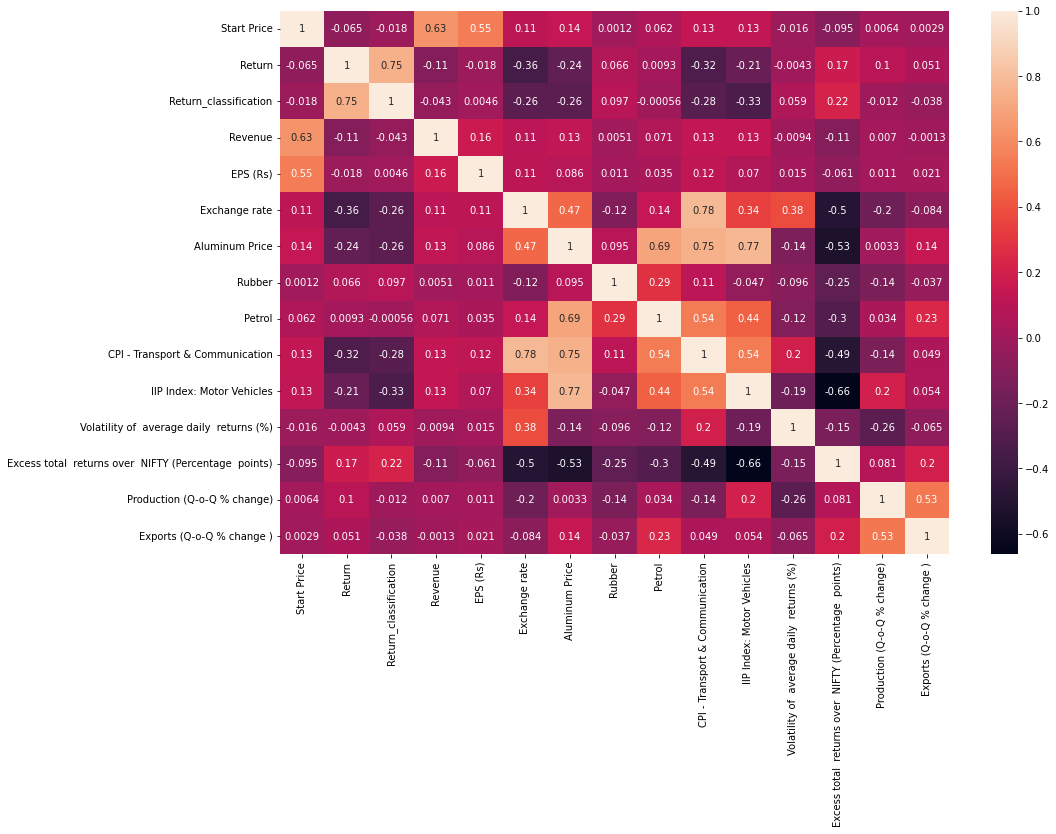

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(All_Company_Dataset.corr(), annot=True)

##### Test-Train Split - 
Since, the dataset is time series, so its splitting should also be done in Time series fashion.  
We will be taking data from 2014 to 2018(20 quarters) as test and data for 2019(4 quarters) as Test data.

In [5]:
#Train and Test data getting splitted.
trainQuarters = ['Q1-2014','Q2-2014','Q3-2014','Q4-2014','Q1-2015','Q2-2015','Q3-2015','Q4-2015','Q1-2016','Q2-2016',
                 'Q3-2016','Q4-2016','Q1-2017','Q2-2017','Q3-2017','Q4-2017','Q1-2018','Q2-2018','Q3-2018','Q4-2018']
testQuarters = ['Q1-2019','Q2-2019','Q3-2019','Q4-2019']
All_Company_Train = All_Company_Dataset.loc[trainQuarters,:]
All_Company_Test = All_Company_Dataset.loc[testQuarters,:]

Below is the standardization and one hot encoding done, which will help us preparing the dataset for Regression Modelling.

In [6]:
#Train data normalization.
standard_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False)

features.remove('Return_classification')
features.remove('Quarter')
features.remove('Company')
standard_scaled_data = standard_scaler.fit_transform(All_Company_Train[features])
features.append('Company')
one_hot_encoded_data = one_hot_encoder.fit_transform(All_Company_Train[['Company']])
All_Company_Train_Normalized = np.concatenate([standard_scaled_data,one_hot_encoded_data], axis=1)
All_Company_Train_Normalized

array([[-0.41749448,  0.51634339,  1.1824474 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.40143041,  1.36426238, -0.73878211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48067696,  0.14121659,  0.72735049, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.33544172,  0.51038801, -0.54984175, ...,  0.        ,
         0.        ,  0.        ],
       [-0.68784544,  0.90858333, -0.85365366, ...,  1.        ,
         0.        ,  0.        ],
       [-0.703238  , -0.37914231, -0.85661752, ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
Company_Features = []
for i in range(0,len(All_Company_Dataset.Company.unique())):
    Company_Features.append('Company_' + str(i))

#Train normal data being converted from array to DataFrame
All_Company_Train_Normalized = pd.DataFrame(All_Company_Train_Normalized)
features.remove('Company')
All_Company_Train_Normalized.columns = features+Company_Features
for i in Company_Features:
    All_Company_Train_Normalized[i] = All_Company_Train_Normalized[i].astype(int)
features.append('Company')
All_Company_Train_Normalized.head()

,Start Price,Return,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,...,Company_4,Company_5,Company_6,Company_7,Company_8,Company_9,Company_10,Company_11,Company_12,Company_13
0,-0.417494,0.516343,1.182447,-0.128193,-1.766915,-1.054757,1.5488,-0.061369,-1.20296,-0.592689,...,0,0,0,0,0,1,0,0,0,0
1,-0.401430,1.364262,-0.738782,1.091681,-1.766915,-1.054757,1.5488,-0.061369,-1.20296,-0.592689,...,0,0,0,0,0,0,0,0,0,0
2,-0.480677,0.141217,0.727350,-0.617523,-1.766915,-1.054757,1.5488,-0.061369,-1.20296,-0.592689,...,0,0,0,0,0,0,0,0,1,0
3,0.373597,1.081578,1.388011,0.183399,-1.766915,-1.054757,1.5488,-0.061369,-1.20296,-0.592689,...,0,0,0,0,0,0,1,0,0,0
4,-0.697627,2.790426,-0.286315,-0.509611,-1.766915,-1.054757,1.5488,-0.061369,-1.20296,-0.592689,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Test data normalization
standard_scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False)

features.remove('Company')
standard_scaled_data = standard_scaler.fit_transform(All_Company_Test[features])
features.append('Company')
one_hot_encoded_data = one_hot_encoder.fit_transform(All_Company_Test[['Company']])
All_Company_Test_Normalized = np.concatenate([standard_scaled_data,one_hot_encoded_data], axis=1)
All_Company_Test_Normalized

array([[-0.26469465,  0.3742575 ,  1.43315641, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57711808,  0.20286839, -0.47311685, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59131248, -0.20043877,  2.18112785, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.36726972,  0.72160469, -0.61625144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.67077551,  0.98631297, -0.88287217, ...,  1.        ,
         0.        ,  0.        ],
       [-0.68261738,  0.41318583, -0.88618051, ...,  0.        ,
         0.        ,  0.        ]])

In [9]:
#Test normal data being converted from array to DataFrame
All_Company_Test_Normalized = pd.DataFrame(All_Company_Test_Normalized)
features.remove('Company')
All_Company_Test_Normalized.columns = features+Company_Features
for i in Company_Features:
    All_Company_Test_Normalized[i] = All_Company_Test_Normalized[i].astype(int)
features.append('Company')
All_Company_Test_Normalized.head()

,Start Price,Return,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,...,Company_4,Company_5,Company_6,Company_7,Company_8,Company_9,Company_10,Company_11,Company_12,Company_13
0,-0.264695,0.374258,1.433156,-0.378760,-0.910941,1.465538,-0.017967,0.191446,-1.552301,1.33085,...,0,0,0,0,0,1,0,0,0,0
1,0.577118,0.202868,-0.473117,3.090770,-0.910941,1.465538,-0.017967,0.191446,-1.552301,1.33085,...,0,0,0,0,0,0,0,0,0,0
2,-0.591312,-0.200439,2.181128,-0.518986,-0.910941,1.465538,-0.017967,0.191446,-1.552301,1.33085,...,0,0,0,0,0,0,0,0,1,0
3,3.385024,0.205791,2.660026,0.695216,-0.910941,1.465538,-0.017967,0.191446,-1.552301,1.33085,...,0,0,0,0,0,0,1,0,0,0
4,-0.629941,0.254134,0.575626,-0.479567,-0.910941,1.465538,-0.017967,0.191446,-1.552301,1.33085,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Train and test data Input and Target variables being separated.
All_Company_Train_X = All_Company_Train_Normalized.drop('Return', axis=1)
All_Company_Train_Y = All_Company_Train_Normalized.loc[:,['Return']]
All_Company_Test_X = All_Company_Test_Normalized.drop('Return', axis=1)
All_Company_Test_Y = All_Company_Test_Normalized.loc[:,['Return']]

# Regression Modelling

# Step 1 - 
___Build a regression model. Find the best model between linear regression, KNN. Find the best hyper parameters for the models.___

We have time series dataset, for which we have splitted the data as per the above code executions. We will be using those for training/building our model and post do the predictions on test data for testing the same and calculate the metrics for evaluting the model.

### 1. Linear Regression - 

Let's build the Linear Regression model. We will be using the standardized data and one hot encoding for categorical variables.

In [11]:
lin_model = LinearRegression()
lin_model.fit(All_Company_Train_X, All_Company_Train_Y)
lin_model_predictions = lin_model.predict(All_Company_Test_X)

In [12]:
r2Score = r2_score(All_Company_Test_Y, lin_model_predictions)
print(f'The r-square value is = {r2Score:.4f}')
print(f'The root mean squared value is = {np.sqrt(mean_squared_error(All_Company_Test_Y, lin_model_predictions)):.4f}')

The r-square value is = -0.5878
The root mean squared value is = 1.2601


### 2. KNN Regressor - 

Let's build the KNN Regressor model. We will be using the standardized data and one hot encoding for categorical variables.

In [13]:
r2_scores = {}
for i in range(2,40):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(All_Company_Train_X, All_Company_Train_Y)
    knn_model_regressor_predictions = knn_model.predict(All_Company_Test_X)
    r2Score = r2_score(All_Company_Test_Y, knn_model_regressor_predictions)
    r2_scores[i] = r2Score
    print('K = ' + str(i))
    print(f'The r-square value is = {r2Score:.4f}')
    print(f'The root mean squared value is = {np.sqrt(mean_squared_error(All_Company_Test_Y,knn_model_regressor_predictions)):.4f}')

K = 2
The r-square value is = -0.0569
The root mean squared value is = 1.0281
K = 3
The r-square value is = 0.0445
The root mean squared value is = 0.9775
K = 4
The r-square value is = 0.1120
The root mean squared value is = 0.9423
K = 5
The r-square value is = 0.0718
The root mean squared value is = 0.9635
K = 6
The r-square value is = 0.0871
The root mean squared value is = 0.9554
K = 7
The r-square value is = 0.0613
The root mean squared value is = 0.9688
K = 8
The r-square value is = 0.0788
The root mean squared value is = 0.9598
K = 9
The r-square value is = 0.0891
The root mean squared value is = 0.9544
K = 10
The r-square value is = 0.0920
The root mean squared value is = 0.9529
K = 11
The r-square value is = 0.1072
The root mean squared value is = 0.9449
K = 12
The r-square value is = 0.0997
The root mean squared value is = 0.9488
K = 13
The r-square value is = 0.0773
The root mean squared value is = 0.9606
K = 14
The r-square value is = 0.0679
The root mean squared value is = 

In [14]:
kValue = list(r2_scores.keys())[list(r2_scores.values()).index(max(list(r2_scores.values())))]
print('Best K-Value is - ' + str(kValue))

Best K-Value is - 4


In [15]:
knn_regressor_model = KNeighborsRegressor(n_neighbors=kValue)
knn_regressor_model.fit(All_Company_Train_X, All_Company_Train_Y)
knn_regressor_predictions = knn_regressor_model.predict(All_Company_Test_X)
r2Score = r2_score(All_Company_Test_Y, knn_regressor_predictions)
print(f'The r-square value is = {r2Score:.4f}')
print(f'The root mean squared value is = {np.sqrt(mean_squared_error(All_Company_Test_Y, knn_regressor_predictions)):.4f}')

The r-square value is = 0.1120
The root mean squared value is = 0.9423


__Best model between Linear regression and KNN Regressor -__  
We will be choosing KNN Regressor model, since we are getting better R-Squared value as compared with Linear Regression model and even we are getting a negative R-Squared value for Linear regression which means that Linear Regression is not a good model to work with for this use case. Hence, we will be choosing __KNN Regressor model__ for this usecase.

Best hyperparameters for the models - 

#### Linear Regression Model -  
Linear Regression model does not have any hyper parameters, so we cannot implement hyper parameter tuning in that case.  
#### KNN Regressor Model - 
In this model, we have k-value which can be changed and define the nearest neighbors, so we will be performing the KNN Regression model via GridCV for hyperparameter tuning.

In [16]:
knn_model_hypertuning = KNeighborsRegressor()
hyper_parameters = dict(n_neighbors=range(2,41))
grid_search_Knn = GridSearchCV(estimator=knn_model_hypertuning, param_grid=hyper_parameters,cv=10)
grid_search_Knn_best_model = grid_search_Knn.fit(All_Company_Train_X,All_Company_Train_Y)
grid_search_Knn_best_model.best_params_

{'n_neighbors': 27}

In [17]:
knn_regressor_model = KNeighborsRegressor(n_neighbors=27)
knn_regressor_model.fit(All_Company_Train_X, All_Company_Train_Y)
knn_regressor_predictions = knn_regressor_model.predict(All_Company_Test_X)
r2Score = r2_score(All_Company_Test_Y, knn_regressor_predictions)
print(f'The r-square value is = {r2Score:.4f}')
print(f'The root mean squared value is = {np.sqrt(mean_squared_error(All_Company_Test_Y, knn_regressor_predictions)):.4f}')

The r-square value is = 0.0374
The root mean squared value is = 0.9811


As per the above hyper parameter tuning, the best K-value or neighbors is 27. Based on that we have calculated RMSE and R2-Score.

# Step 2 - 
___Calculate the accuracy of the best model in terms of R2 and RMSE.___

The calculations for the same have been done in step-1. Please refer to the values for R-Squared and RMSE below.

### 1. Linear Regression -  

R-squared value for the model = -0.5878  
Root Mean square error value for the model = 1.2601

### 2. KNN Regressor -  

R-squared value for the model = 0.1120  
Root Mean square error value for the model = 0.9423

# Step 3 - 
___Calculate the prediction interval.___  
  
  
Let's calculate the prediction intervals and plot them for the train data.  
We will be considering the prediction interval to be 95%, so that lower value will be 2.5 percentile and the upper value will be 97.5 percentile.

In [18]:
lower_alpha = 0.025
upper_alpha = 0.975

#Building separate models for the lower and upper values of prediction intervals and the actual prediction value - 
## Model defining
lower_prediction_model = GradientBoostingRegressor(loss='quantile',alpha=lower_alpha)
upper_prediction_model = GradientBoostingRegressor(loss='quantile',alpha=upper_alpha)
actual_prediction_model = GradientBoostingRegressor(loss='ls')

In [19]:
##Training model
lower_prediction_model.fit(All_Company_Train_X, All_Company_Train_Y)
upper_prediction_model.fit(All_Company_Train_X, All_Company_Train_Y)
actual_prediction_model.fit(All_Company_Train_X, All_Company_Train_Y)

GradientBoostingRegressor(loss='ls')

In [20]:
prediction_interval_dataframe = pd.DataFrame(All_Company_Test.index + " - " + All_Company_Test.Company).rename({0:'Quarter - Company'},axis=1)
prediction_interval_dataframe['ActualValue'] = All_Company_Test_Y.Return.values
##Predictions on Test Data.
prediction_interval_dataframe['LowerValue'] = lower_prediction_model.predict(All_Company_Test_X)
prediction_interval_dataframe['UpperValue'] = upper_prediction_model.predict(All_Company_Test_X)
prediction_interval_dataframe['PredictedValue'] = actual_prediction_model.predict(All_Company_Test_X)
prediction_interval_dataframe.head()

,Quarter - Company,ActualValue,LowerValue,UpperValue,PredictedValue
Quarter,,,,,
Q1-2019,Q1-2019 - M&M.NS,0.374258,-1.103029,1.075596,-0.007177
Q1-2019,Q1-2019 - EICHERMOT.NS,0.202868,-1.003894,1.506736,0.078755
Q1-2019,Q1-2019 - TATAMOTORS.NS,-0.200439,-1.128214,1.683983,-0.589862
Q1-2019,Q1-2019 - MARUTI.NS,0.205791,-1.024160,0.895704,-0.019267
Q1-2019,Q1-2019 - ASHOKLEY.NS,0.254134,-1.094034,1.576398,-0.286833


In [21]:
## Re-converting standard data to values to the form it should actually be.
target_variable_mean = np.mean(All_Company_Test.Return.values)
target_variable_sd = statistics.stdev(All_Company_Test.Return.values)
re_convert = lambda x : (x*target_variable_sd) + target_variable_mean
prediction_interval_dataframe.ActualValue = prediction_interval_dataframe.ActualValue.apply(re_convert)
prediction_interval_dataframe.PredictedValue = prediction_interval_dataframe.PredictedValue.apply(re_convert)
prediction_interval_dataframe.LowerValue = prediction_interval_dataframe.LowerValue.apply(re_convert)
prediction_interval_dataframe.UpperValue = prediction_interval_dataframe.UpperValue.apply(re_convert)

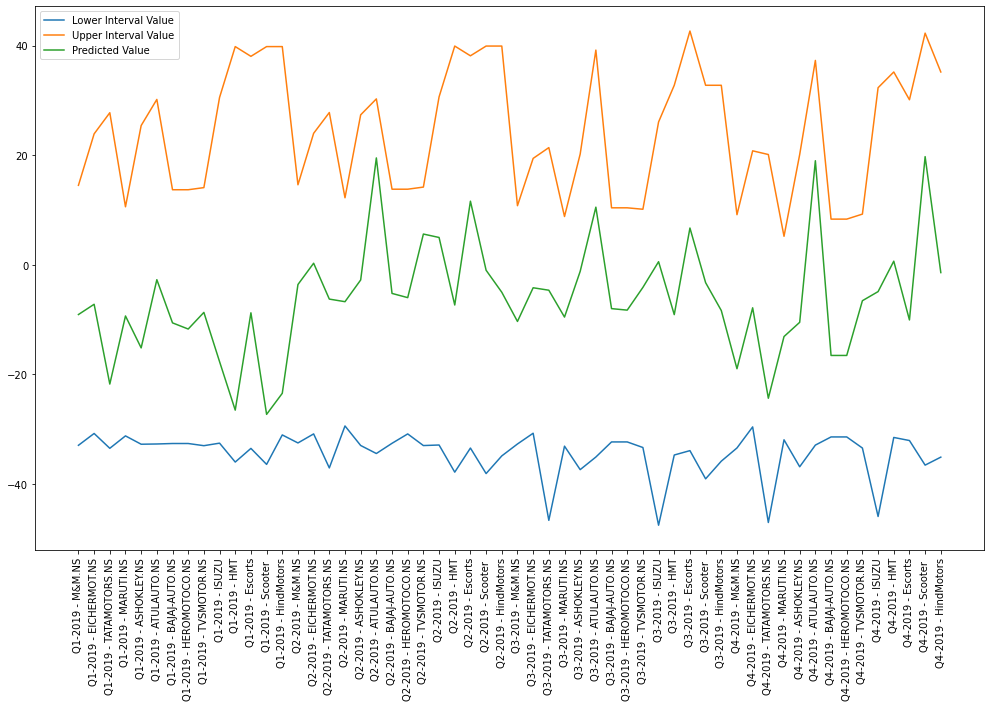

In [22]:
plt.figure(figsize=(17,10))
plt.xticks(rotation=90)
plt.plot(prediction_interval_dataframe['Quarter - Company'],prediction_interval_dataframe.LowerValue,label='Lower Interval Value')
plt.plot(prediction_interval_dataframe['Quarter - Company'],prediction_interval_dataframe.UpperValue,label='Upper Interval Value')
plt.plot(prediction_interval_dataframe['Quarter - Company'],prediction_interval_dataframe.PredictedValue,label='Predicted Value')
plt.legend()

As we can see on the above plot, all the predictions are between the prediction intervals. The prediction intervals is choosed to be 95%, which means, that we are 95% confident that the predicted value will be within the defined prediction interval.

# Step 4 - 
___Do an error analysis to find out where the large errors are occurring.___

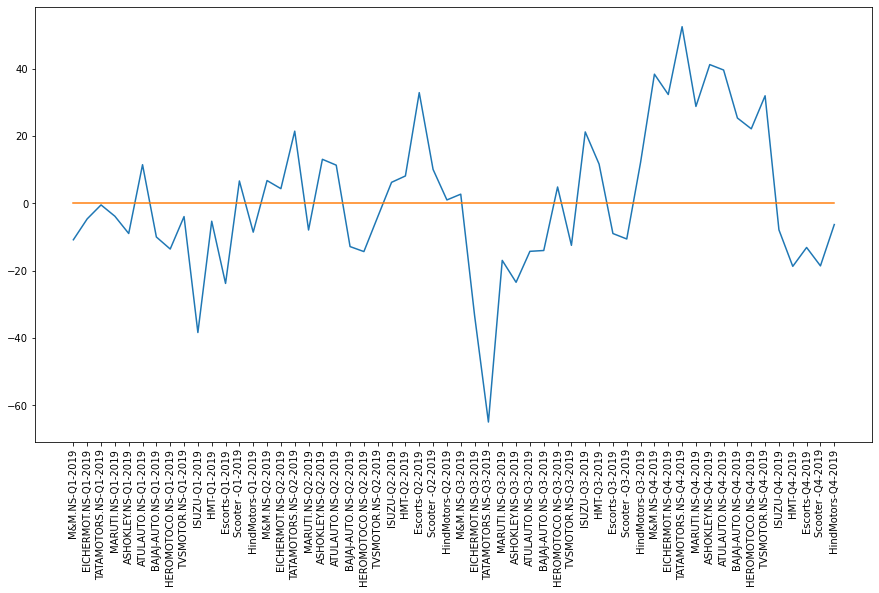

In [23]:
Train_Data_Analysis = pd.DataFrame(knn_regressor_predictions).rename({0:'Predicted'},axis=1)
Train_Data_Analysis['Actual'] = All_Company_Test_Y.Return.values
Train_Data_Analysis['Actual'] = Train_Data_Analysis.Actual.apply(re_convert)
Train_Data_Analysis['Predicted'] = Train_Data_Analysis.Predicted.apply(re_convert)
Train_Data_Analysis['Error'] = Train_Data_Analysis.Predicted - Train_Data_Analysis.Actual

Train_Data_Analysis['Zero'] = 0
Train_Data_Analysis.head()
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.plot(All_Company_Test.Company+'-'+All_Company_Test.index, Train_Data_Analysis.Error)
plt.plot(All_Company_Test.Company+'-'+All_Company_Test.index, Train_Data_Analysis.Zero)

For error analysis, we have calculated the error between the predicted data and the test data, based on which we have plotted the graph. This helps us analyze the amount of errors we are getting.
1. TATAMOTORS - Q3-2019
2. TATAMOTORS - Q4-2019
3. ASHOKLEYLAND - Q4-2019
4. ATULATUO - Q4-2019
  
The above mentioned companies are where the large errors are occuring.

# Step 5 - 
___Save the model for future deployment.___

In [24]:
#Defining the class to save the model for future deployment.
class StockGainRegressionPredictionModel():
    def __init__(self, model, features, rmse, r2square):
        self.model = model
        self.features = features
        self.rmse = rmse
        self.r2square = r2square

In [25]:
#Declaring the class and assigning the values to it.
FinalModelForDeployment = StockGainRegressionPredictionModel(
    knn_regressor_model,All_Company_Test_Y.columns,
    np.sqrt(mean_squared_error(All_Company_Test_Y, knn_regressor_predictions)),
    r2_score(All_Company_Test_Y, knn_regressor_predictions))

In [26]:
dump(FinalModelForDeployment,folderPath + '/StockGainPrediction.pkl')

['C:/Users/harsi/OneDrive - Indian School of Business/AMPBA/Term3/MLSL1/GroupProject/StockGainPrediction.pkl']

The model has been dumbed to the pickled file, which can further be used for the predictions.

### Regression Modelling ends here.

# Classification Modelling

In [27]:
#Classification Target Data - 
Classification_Train_Y = All_Company_Dataset.loc[trainQuarters,['Return_classification']]
Classification_Test_Y = All_Company_Dataset.loc[testQuarters,['Return_classification']]

# Step 1 - 
___Build a classification model. Find the best model between logistic regression, KNN and Decision Tree.___

### 1. Logistic Regression

Let's prepare the dataset for the training and testing for Logistic Regression. We need not standardize the data for the same, but we will be performing one-hot encoding for the categorical variables

In [28]:
#Train Input Data
Logistic_Classifier_Train_Data_X = All_Company_Train.copy()
Logistic_Classifier_Train_Data_X.drop(['Return','Return_classification'], axis=1, inplace=True)
Logistic_Classifier_Train_Data_X = pd.get_dummies(Logistic_Classifier_Train_Data_X, columns=['Company'])
Logistic_Classifier_Train_Data_X.head()

,Start Price,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,Volatility of average daily returns (%),...,Company_Escorts,Company_HEROMOTOCO.NS,Company_HMT,Company_HindMotors,Company_ISUZU,Company_M&M.NS,Company_MARUTI.NS,Company_Scooter,Company_TATAMOTORS.NS,Company_TVSMOTOR.NS
Quarter,,,,,,,,,,,,,,,,,,,,,
Q1-2014,474.000000,11000.73,15.19,59.84,103971.0,139.61,70.95,114.0,101.8,0.95,...,0,0,0,0,0,1,0,0,0,0
Q1-2014,500.195007,635.73,59.39,59.84,103971.0,139.61,70.95,114.0,101.8,0.95,...,0,0,0,0,0,0,0,0,0,0
Q1-2014,370.970978,8545.49,-2.54,59.84,103971.0,139.61,70.95,114.0,101.8,0.95,...,0,0,0,0,0,0,0,0,1,0
Q1-2014,1764.000000,12109.74,26.48,59.84,103971.0,139.61,70.95,114.0,101.8,0.95,...,0,0,0,0,0,0,1,0,0,0
Q1-2014,17.200001,3076.78,1.37,59.84,103971.0,139.61,70.95,114.0,101.8,0.95,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#Test Input Data
Logistic_Classifier_Test_Data_X = All_Company_Test.copy()
Logistic_Classifier_Test_Data_X.drop(['Return','Return_classification'], axis=1, inplace=True)
Logistic_Classifier_Test_Data_X = pd.get_dummies(Logistic_Classifier_Test_Data_X, columns=['Company'])
Logistic_Classifier_Test_Data_X.head()

,Start Price,Revenue,EPS (Rs),Exchange rate,Aluminum Price,Rubber,Petrol,CPI - Transport & Communication,IIP Index: Motor Vehicles,Volatility of average daily returns (%),...,Company_Escorts,Company_HEROMOTOCO.NS,Company_HMT,Company_HindMotors,Company_ISUZU,Company_M&M.NS,Company_MARUTI.NS,Company_Scooter,Company_TATAMOTORS.NS,Company_TVSMOTOR.NS
Quarter,,,,,,,,,,,,,,,,,,,,,
Q1-2019,773.349976,14035.16,7.13,69.370003,130009.1,119.5,74.34,135.3,121.1,1.33,...,0,0,0,0,0,1,0,0,0,0
Q1-2019,2319.510010,2499.60,176.12,69.370003,130009.1,119.5,74.34,135.3,121.1,1.33,...,0,0,0,0,0,0,0,0,0,0
Q1-2019,173.449997,18561.41,0.30,69.370003,130009.1,119.5,74.34,135.3,121.1,1.33,...,0,0,0,0,0,0,0,0,1,0
Q1-2019,7476.799805,21459.40,59.44,69.370003,130009.1,119.5,74.34,135.3,121.1,1.33,...,0,0,0,0,0,0,1,0,0,0
Q1-2019,102.500000,8845.93,2.22,69.370003,130009.1,119.5,74.34,135.3,121.1,1.33,...,0,0,0,0,0,0,0,0,0,0


__Model Building -__

In [30]:
logistic_regression_model = LogisticRegression(random_state = 100, max_iter = 1000)
logistic_regression_model.fit(Logistic_Classifier_Train_Data_X,Classification_Train_Y)
logistic_regression_predictions = logistic_regression_model.predict(Logistic_Classifier_Test_Data_X)
score = accuracy_score(Classification_Test_Y, logistic_regression_predictions)*100
print(f'The accuracy is = {score:.4f}%')

The accuracy is = 69.6429%


##### Result - 
The Logisitic Regression model has given accuracy of - 69.6%.

### 2. KNN Classifier - 

Let's prepare the dataset for the training and testing for K-Nearest Neighbours. We will be standardizing the data for the same, also we will be performing one-hot encoding for the categorical variables

__Model Building -__

In [31]:
accuracy_scores = {}
for i in range(2,40):
    knn_classifier_model = KNeighborsClassifier(n_neighbors=i)
    knn_classifier_model.fit(All_Company_Train_X, Classification_Train_Y)
    knn_classifier_predictions = knn_classifier_model.predict(All_Company_Test_X)
    score = accuracy_score(Classification_Test_Y, knn_classifier_predictions)*100
    accuracy_scores[i] = score
    print('K = ' + str(i))
    print(f'The accuracy is = {score:.4f}%')

K = 2
The accuracy is = 80.3571%
K = 3
The accuracy is = 69.6429%
K = 4
The accuracy is = 67.8571%
K = 5
The accuracy is = 62.5000%
K = 6
The accuracy is = 69.6429%
K = 7
The accuracy is = 60.7143%
K = 8
The accuracy is = 67.8571%
K = 9
The accuracy is = 64.2857%
K = 10
The accuracy is = 76.7857%
K = 11
The accuracy is = 69.6429%
K = 12
The accuracy is = 80.3571%
K = 13
The accuracy is = 75.0000%
K = 14
The accuracy is = 76.7857%
K = 15
The accuracy is = 73.2143%
K = 16
The accuracy is = 73.2143%
K = 17
The accuracy is = 76.7857%
K = 18
The accuracy is = 73.2143%
K = 19
The accuracy is = 69.6429%
K = 20
The accuracy is = 67.8571%
K = 21
The accuracy is = 75.0000%
K = 22
The accuracy is = 71.4286%
K = 23
The accuracy is = 69.6429%
K = 24
The accuracy is = 71.4286%
K = 25
The accuracy is = 71.4286%
K = 26
The accuracy is = 71.4286%
K = 27
The accuracy is = 71.4286%
K = 28
The accuracy is = 69.6429%
K = 29
The accuracy is = 69.6429%
K = 30
The accuracy is = 71.4286%
K = 31
The accuracy is

In [32]:
indices = [i for i, x in enumerate(list(accuracy_scores.values())) if x == max(list(accuracy_scores.values()))]
kValue = list(accuracy_scores.keys())[max(indices)]
kValue

12

##### Let's figure the optimum K-Value which provides us with maximum accuracy for KNN classifier.

The best accuracy for the KNN Classifier is - 80.3571%, for K-Value = 12


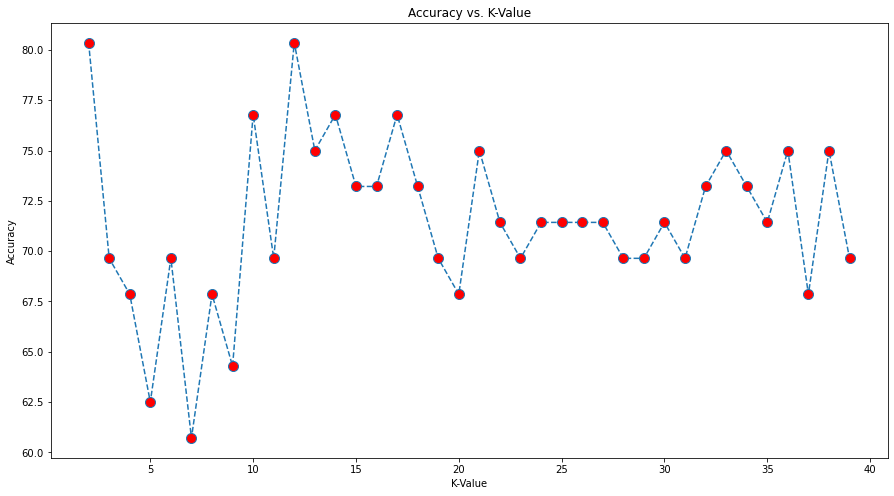

In [33]:
plt.figure(figsize=(15,8))
plt.plot(accuracy_scores.keys(),accuracy_scores.values(),linestyle='dashed',marker='o',markerfacecolor='red',
         markersize=10)
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
print('The best accuracy for the KNN Classifier is - ' + str(np.round(max(list(accuracy_scores.values())),4)) + '%, for K-Value = ' + str(kValue))

In [34]:
knn_classifier_model = KNeighborsClassifier(n_neighbors=kValue)
knn_classifier_model.fit(All_Company_Train_X, Classification_Train_Y)
knn_classifier_predictions = knn_classifier_model.predict(All_Company_Test_X)
score = accuracy_score(Classification_Test_Y, knn_classifier_predictions)*100
print(f'The accuracy is = {score:.4f}%')

The accuracy is = 80.3571%


##### Result - 
The KNN Classifier model has given accuracy of - 80.36%.

### 3. Decision Tree

The dataset for the decision tree model will be same as Logistic regression model. This is because the decision tree model should be given non-standardzed data as input for better interpretation along with categorical variables passed with one hot encoding.

In [35]:
clf_tree = DecisionTreeClassifier()
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
clf_grid_search = GridSearchCV(clf_tree, tuned_parameters, scoring = 'accuracy')
clf_grid_search.fit(Logistic_Classifier_Train_Data_X,Classification_Train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='accuracy')

Checking the best parameters - 

In [36]:
clf_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

Applying Best Paramters Criterion of gini & Depth of 2. In case of maximum depth being taken as 2, we will not be able to interpret the decision tree, so we will be taking the maximum depth as 6, without compromising much on accuracy.

__Model Preparation -__

In [37]:
decision_tree_classifier_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 8)
decision_tree_classifier_model.fit(Logistic_Classifier_Train_Data_X,Classification_Train_Y)
decision_tree_classifier_predicitions = decision_tree_classifier_model.predict(Logistic_Classifier_Test_Data_X)
score = accuracy_score(Classification_Test_Y, decision_tree_classifier_predicitions)*100
print(f'The accuracy is = {score:.4f}%')

The accuracy is = 51.7857%


Let's checkout the decision tree - 

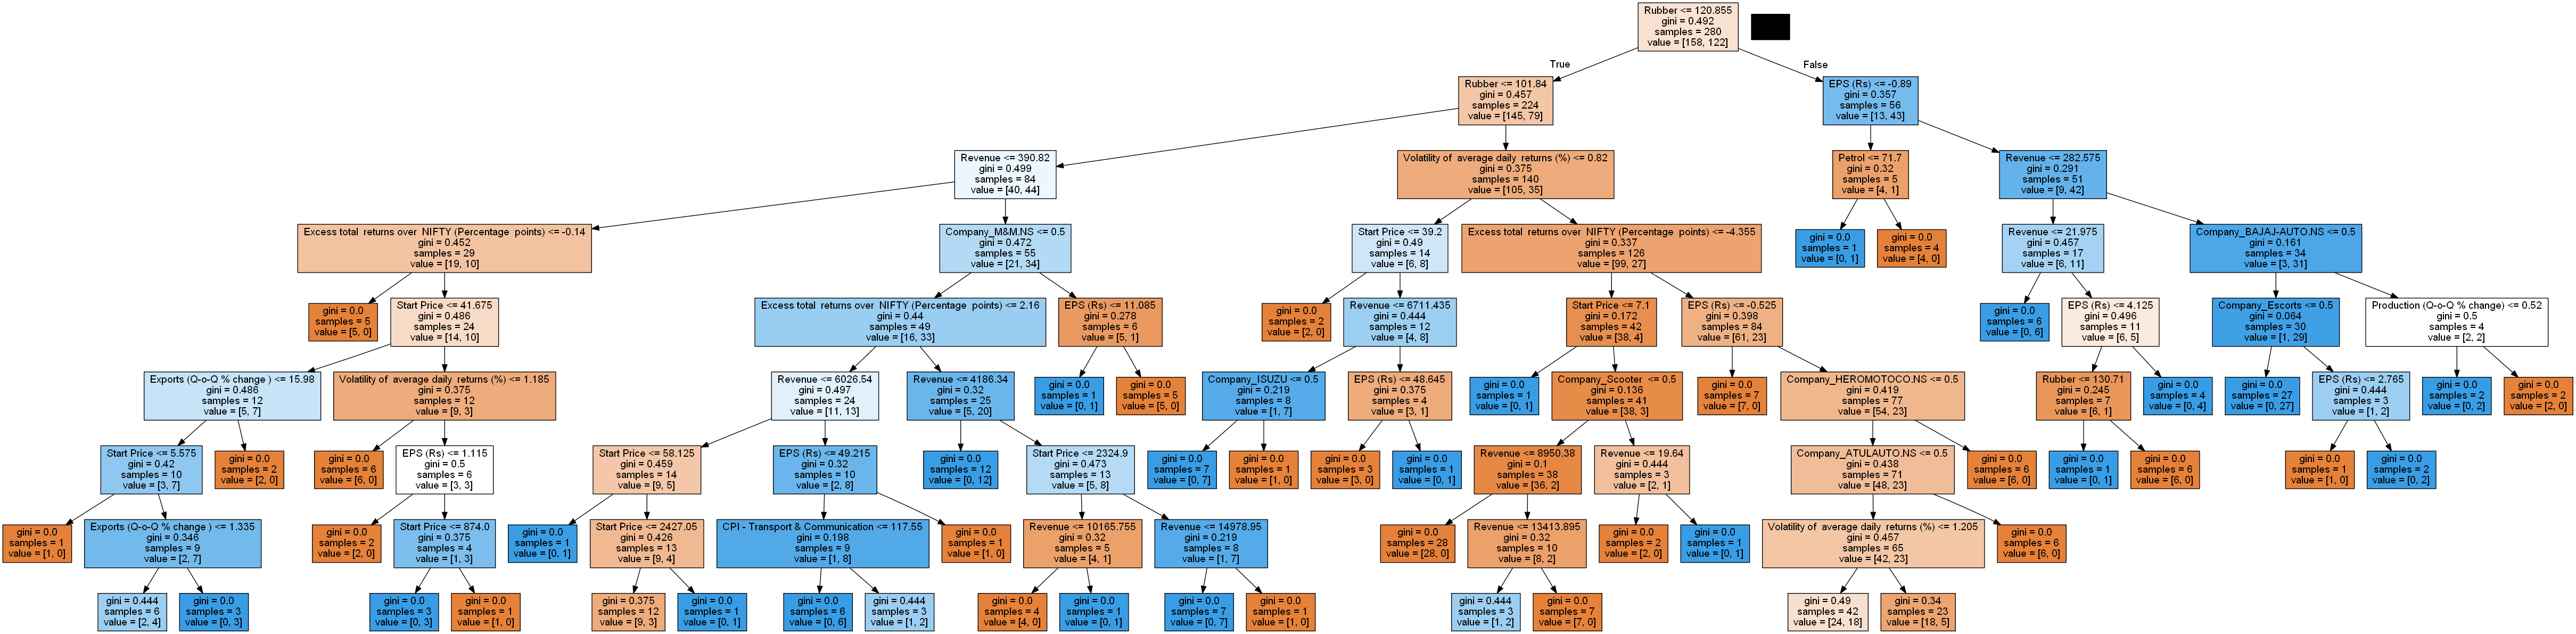

In [38]:
dot_data = StringIO()
export_graphviz(decision_tree_classifier_model, out_file=dot_data,  
                feature_names = Logistic_Classifier_Train_Data_X.columns,
                filled=True)

graph = pdot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### Result - 
The Decision Tree Classifier model has given accuracy of - 51.78%.

__Best model between Logistic regression, KNN Classifier and Decision Tree Classifier -__  
We will be choosing KNN Regressor model, since we are getting best accuracy as compared with Logistic Regression and Decision Tree Classifier model. Hence, we will be choosing __KNN Classifier model__ for this usecase.

# Step 2 - 
___Find the best hyper parameters to choose the model.___

#### Logistic Regression - 
The logistic regression model have the parameters which can hyper tuned, but more or less to get the maximum accuracy we need to hyper tune the maximum interations. But, if we take the large value for maximum iterations, then we will be getting best accuracy, so without hypertuning also, we can have best accuracy which model can provide.
#### KNN Classifier - 
In KNN Classifier, we will be able to hyper tune the K-Value or neighbors, for getting the best performance. Let's checkout for the same and find the best hypertuned parameter.

In [39]:
knn_classifier_model_hypertuning = KNeighborsClassifier()
hyper_parameters = dict(metric=['euclidean','manhattan'],n_neighbors=range(2,30))
grid_search_Knn = GridSearchCV(estimator=knn_classifier_model_hypertuning,
                               param_grid=hyper_parameters,
                               cv=10)
grid_search_Knn_best_model = grid_search_Knn.fit(All_Company_Train_X,Classification_Train_Y)
grid_search_Knn_best_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 28}

In [40]:
knn_classifier_model_hypertuning = KNeighborsClassifier(metric='euclidean',n_neighbors=28)
knn_classifier_model_hypertuning.fit(All_Company_Train_X, Classification_Train_Y)
knn_classifier_model_hypertuning_predictions = knn_classifier_model.predict(All_Company_Test_X)
score = accuracy_score(Classification_Test_Y, knn_classifier_model_hypertuning_predictions)*100
print(f'The accuracy is = {score:.4f}%')

The accuracy is = 80.3571%


The hyperparameter tuning of KNN Classifier model is done and we have been suggested 28 neighbors with metric to be used as - Euclidean.  
#### Decision Tree Classifier - 
The decision tree classifier model was build above in Step-1 and has been build by performing hypertuning, and the results have been mentioned below -  
Criterion - gini  
Maximum Depth - 8

# Step 3 - 
___Build a confusion matrix. Explain the cost of False negatives and false positives. (Only explain which has higher cost. No need to assign actual cost.)___

### 1. Logistic Regression  

Let's checkout the confusion matrix for Logistic regression and also discuss about the False Negatives and False Positives

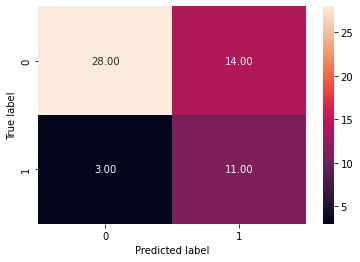

In [41]:
cm = confusion_matrix(Classification_Test_Y, logistic_regression_predictions)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### False Negatives - 3 :-
This is the case where we will be predicting less than 4%, but will get more than 4%
##### False Postives - 14 :-
This is the case where we will be predicting greater than 4%, but will get less than 4%.
  
  
_So, false positives will be having the higher cost when compared with False negatives._  

### 2. KNN Classifier

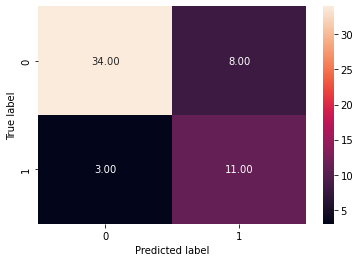

In [42]:
cm = confusion_matrix(Classification_Test_Y, knn_classifier_predictions)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### False Negatives - 3 :-
This is the case where we will be predicting less than 4%, but will get more than 4%
##### False Postives - 8 :-
This is the case where we will be predicting greater than 4%, but will get less than 4%.
  
  
_So, false positives will be having the higher cost when compared with False negatives._

### 3. Decision Tree

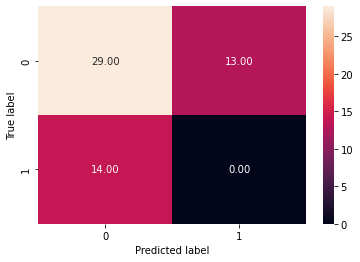

In [43]:
cm = confusion_matrix(Classification_Test_Y, decision_tree_classifier_predicitions)
sns.heatmap(cm, annot=True, fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### False Negatives - 14 :-
This is the case where we will be predicting less than 4%, but will get more than 4%
##### False Postives - 13 :-
This is the case where we will be predicting greater than 4%, but will get less than 4%.
  
  
_So, false negatives will be having the higher cost when compared with False negatives._

# Step 4 - 
___Find out which accuracy metrics will be applicable for this use case and evaluate the model. And provide justification for the accuracy metrics chosen.___  
  
    
Let's check out the classification report, which contains - Recall score, Precision score and F1 score.

### 1. Logistic Regression

In [44]:
print(classification_report(Classification_Test_Y, logistic_regression_predictions))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77        42
           1       0.44      0.79      0.56        14

    accuracy                           0.70        56
   macro avg       0.67      0.73      0.67        56
weighted avg       0.79      0.70      0.72        56



Accuracy Score for the Logistic regression model is - 69.6%

### 2. KNN Classifier

In [45]:
print(classification_report(Classification_Test_Y, knn_classifier_predictions))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        42
           1       0.58      0.79      0.67        14

    accuracy                           0.80        56
   macro avg       0.75      0.80      0.76        56
weighted avg       0.83      0.80      0.81        56



Accuracy Score for the KNN Classifier model is - 80.36%

### 3. Decision Tree

In [46]:
print(classification_report(Classification_Test_Y, decision_tree_classifier_predicitions))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        42
           1       0.00      0.00      0.00        14

    accuracy                           0.52        56
   macro avg       0.34      0.35      0.34        56
weighted avg       0.51      0.52      0.51        56



Accuracy Score for the Decision Tree Classifier model is - 51.78%

__Justification for choosing Accuracy Score as the appropriate metric -__  
We have chosen "Accuracy Score" of the model as the appropriate accuracy metric for choosing the model. 

If the predictions are for 0 or if the predictions are for 1, both are of equal importance to us. The usecase which we are trying to solve is of stock price change. This can go negative and positive as well, in both the cases we either need to take out the money or invest more in the market, which will help us have the maximum profits.  

Thus, Recall or Precision would not be accurate since, it would either be focusing on one of the use cases (i.e when to invest more or when to take out the money). 

In this scenario, "Accuracy Score" will help us to have both the things, hence we have chosen accuracy score.

# Step 5 - 
___Find the feature importance from the Random Forest model.___

### Random Forest for Feature Importance -  
Let's define the Random Forest Classifier model, based on which we will try to find the importance of features.

In [47]:
rand_forest_classifier_model = RandomForestClassifier(n_estimators=500, random_state=1)
rand_forest_classifier_model.fit(Logistic_Classifier_Train_Data_X, Classification_Train_Y)
feature_importances = rand_forest_classifier_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feat_labels = Logistic_Classifier_Train_Data_X.columns[0:]
for f in range(Logistic_Classifier_Train_Data_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 65,
                                   feat_labels[sorted_indices[f]],
                                   feature_importances[sorted_indices[f]]*100) + "%")

 1) Revenue                                                           13.140007%
 2) EPS (Rs)                                                          12.849725%
 3) Start Price                                                       12.559376%
 4) Rubber                                                            5.939206%
 5) Petrol                                                            5.331713%
 6) IIP Index: Motor Vehicles                                         5.065585%
 7) CPI - Transport & Communication                                   4.723378%
 8) Aluminum Price                                                    4.519259%
 9) Excess total  returns over  NIFTY (Percentage  points)            4.419648%
10) Exchange rate                                                     4.075476%
11) Exports (Q-o-Q % change )                                         3.070114%
12) Volatility of  average daily  returns (%)                         2.700684%
13) Production (Q-o-Q % change)      

Above, we have defined the variables and the importance in percentage they carry in the model. These are arranged in the increasing order. The top 7 important variables for the model are -   
1) Revenue  
2) EPS (Rs)  
3) Start Price  
4) Rubber  
5) Petrol  
6) IIP Index: Motor Vehicles  
7) CPI - Transport & Communication  

# Step 6 - 
___Build a final decision tree with features that have cumulative importance of at least 95% and visualize the decision tree and explain the rules.___

In [48]:
cumulative_importance_sum = 0
important_features = []
for f in range(All_Company_Train_X.shape[1]):
    cumulative_importance_sum = cumulative_importance_sum + feature_importances[sorted_indices[f]]
    important_features.append(feat_labels[sorted_indices[f]])
    if cumulative_importance_sum > 0.95:
        break
print(important_features)

['Revenue', 'EPS (Rs)', 'Start Price', 'Rubber', 'Petrol', 'IIP Index: Motor Vehicles', 'CPI - Transport & Communication', 'Aluminum Price', 'Excess total  returns over  NIFTY (Percentage  points)', 'Exchange rate', 'Exports (Q-o-Q % change )', 'Volatility of  average daily  returns (%)', 'Production (Q-o-Q % change)', 'Company_Scooter ', 'Company_M&M.NS', 'Company_BAJAJ-AUTO.NS', 'Company_Escorts', 'Company_ASHOKLEY.NS', 'Company_HMT', 'Company_ISUZU', 'Company_HEROMOTOCO.NS', 'Company_TATAMOTORS.NS', 'Company_ATULAUTO.NS']


Above mentioned features contain the 95% importance of the models. Let's build the ___Decision Tree Classifier___ based on these features.

In [49]:
clf_tree = DecisionTreeClassifier()
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': range(2,10)}]
clf_grid_search = GridSearchCV(clf_tree, tuned_parameters, scoring = 'accuracy')
clf_grid_search.fit(Logistic_Classifier_Train_Data_X[important_features],Classification_Train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='accuracy')

In [50]:
clf_grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

Applying Best Paramters Criterion of gini & Depth of 2. In case of maximum depth being taken as 2, we will not be able to interpret the decision tree, so we will be taking the maximum depth as 6, without compromising much on accuracy.

In [53]:
decision_tree_classifier_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 8)
decision_tree_classifier_model.fit(Logistic_Classifier_Train_Data_X[important_features],Classification_Train_Y)
decision_tree_classifier_predicitions = decision_tree_classifier_model.predict(Logistic_Classifier_Test_Data_X[important_features])
score = accuracy_score(Classification_Test_Y, decision_tree_classifier_predicitions)*100
print(f'The accuracy is = {score:.4f}%')

The accuracy is = 55.3571%


Let's checkout the decision tree - 

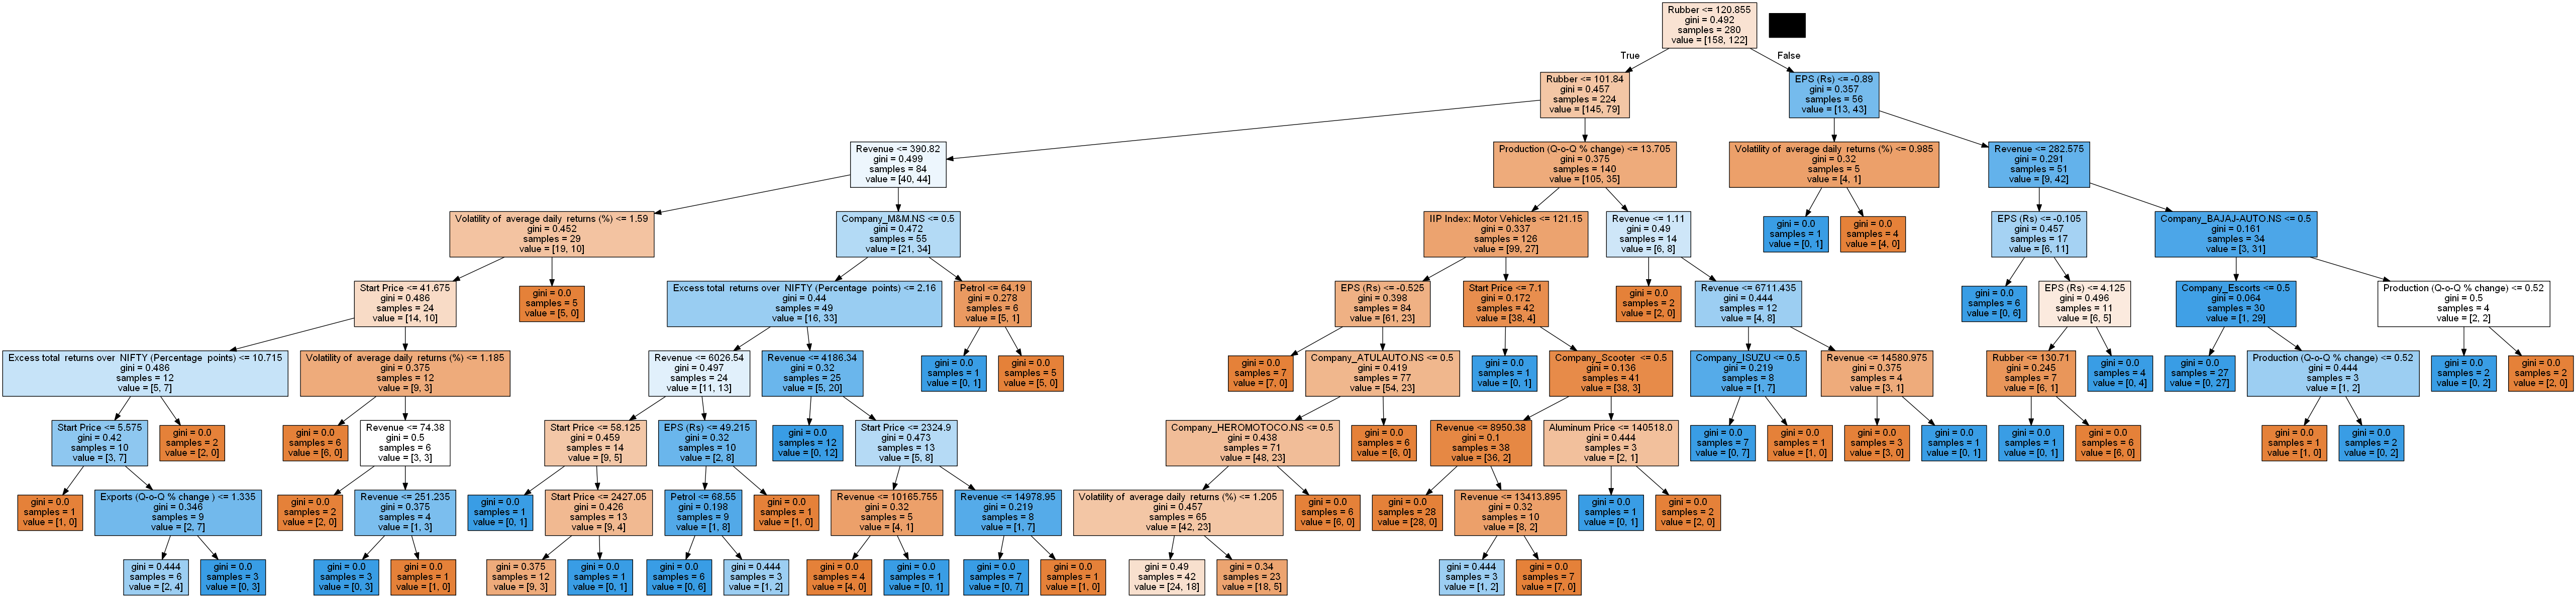

In [54]:
dot_data = StringIO()
export_graphviz(decision_tree_classifier_model, out_file=dot_data,
                feature_names=Logistic_Classifier_Train_Data_X[important_features].columns,
                filled=True)

graph = pdot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The explanation of the Decision Tree Rules is as mentioned below - 

Cases when there is high chance of +ve return
- Company is not Ashok Leyland & M&M & Exports < 1.335 & Revenue < 390 & Rubber < 101
- Company is not escorts & Bajaj Auto & revenue < 282 & eps < -0.89 & Rubber <120

Case when there is high chance of -ve return:
- Company is not M&M & Start price < 7.1 & IIP motor index < 121 & Production <13 & Revenue < 390 & Rubber < 101

### Classification Modelling ends here.

# Thank You.